In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import json
from tqdm.notebook import tqdm

In [111]:
with open('/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/USPTO-50k/raw/train.input') as f:
    uspto = [x.strip() for x in f.readlines()]
with open('/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/USPTO-50k/raw/valid.input') as f:
    uspto += [x.strip() for x in f.readlines()]
with open('/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/USPTO-50k/raw/test.input') as f:
    uspto += [x.strip() for x in f.readlines()]
    
with open('/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/ZINC_first_version/raw/train.input') as f:
    zinc = [x.strip() for x in f.readlines()]
with open('/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/ZINC_first_version/raw/valid.input') as f:
    zinc += [x.strip() for x in f.readlines()]

In [112]:
len(uspto), len(zinc)

(135605, 249455)

In [58]:
uspto_list = list(''.join(uspto))
zinc_list = list(''.join(zinc))

In [59]:
len(zinc_list), len(uspto_list)

(9947571, 4788210)

In [60]:
vocab = set(uspto_list + zinc_list)

In [61]:
uspto_counts = {char:0 for char in vocab}
zinc_counts = {char:0 for char in vocab}

In [62]:
for char in uspto_list:
    uspto_counts[char] += 1
for char in zinc_list:
    zinc_counts[char] += 1

In [75]:
uspto_counts = dict(sorted(uspto_counts.items(), key=lambda k:k[1], reverse=True))

In [76]:
keys = uspto_counts.keys()

In [64]:
zinc_counts.keys()

dict_keys(['S', 'F', 'i', '3', 'p', 'N', '5', 'I', '4', 'g', 'B', '\\', 'P', 'O', 'r', 'o', '7', '9', '2', 'l', '+', '/', '=', ')', 'Z', '[', 'e', ']', '#', '(', 'c', '8', '@', 'M', '1', 'u', '-', '6', 'C', 's', 'n', 'H'])

In [77]:
npuspto = np.array([uspto_counts[k] for k in keys]) / len(uspto_list)

npzinc = np.array([zinc_counts[k] for k in keys]) / len(zinc_list)

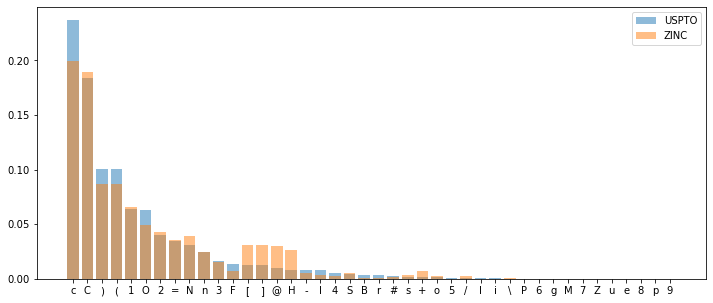

In [80]:
plt.figure(figsize=(12,5))
plt.bar(keys, npuspto, alpha=0.5, label='USPTO')
plt.bar(keys, npzinc, alpha=0.5, label='ZINC')
plt.legend();

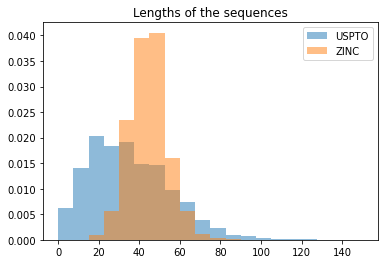

In [81]:
plt.figure()
plt.hist([len(x) for x in uspto], bins=20, range=(0, 150), alpha=0.5, density=True, label='USPTO')
plt.hist([len(x) for x in zinc], bins=20, range=(0, 150), alpha=0.5, density=True, label='ZINC')
plt.title("Lengths of the sequences")
plt.legend();

# Tokens?

In [82]:
with open('/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/USPTO-50k/tokenized/train.input') as f:
    uspto = [x.strip() for x in f.readlines()]
with open('/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/USPTO-50k/tokenized/valid.input') as f:
    uspto += [x.strip() for x in f.readlines()]
with open('/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/USPTO-50k/tokenized/test.input') as f:
    uspto += [x.strip() for x in f.readlines()]
    
with open('/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/ZINC_first_version/tokenized/train.input') as f:
    zinc = [x.strip() for x in f.readlines()]

In [83]:
len(uspto), len(zinc)

(135605, 224507)

In [89]:
uspto_list = ' '.join(uspto).split(' ')
zinc_list = ' '.join(zinc).split(' ')

In [91]:
len(zinc_list), len(uspto_list)

(7256628, 3521007)

In [92]:
vocab = set(uspto_list + zinc_list)

In [94]:
len(vocab)

378

In [95]:
uspto_counts = {char:0 for char in vocab}
zinc_counts = {char:0 for char in vocab}

In [96]:
for char in uspto_list:
    uspto_counts[char] += 1
for char in zinc_list:
    zinc_counts[char] += 1

In [97]:
uspto_counts = dict(sorted(uspto_counts.items(), key=lambda k:k[1], reverse=True))

In [103]:
keys = list(uspto_counts.keys())

In [106]:
npuspto = np.array([uspto_counts[k] for k in keys]) / len(uspto_list)

npzinc = np.array([zinc_counts[k] for k in keys) / len(zinc_list)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-106-b503dc88e09d>, line 3)

In [107]:
m = 50

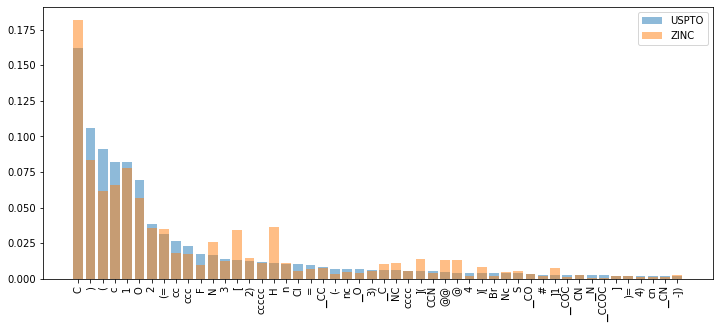

In [109]:
plt.figure(figsize=(12,5))
plt.bar(keys[:m], npuspto[:m], alpha=0.5, label='USPTO')
plt.bar(keys[:m], npzinc[:m], alpha=0.5, label='ZINC')
plt.xticks(rotation = 90)
plt.legend();

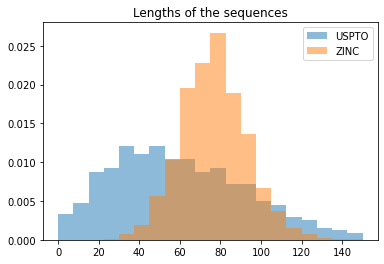

In [110]:
plt.figure()
plt.hist([len(x) for x in uspto], bins=20, range=(0, 150), alpha=0.5, density=True, label='USPTO')
plt.hist([len(x) for x in zinc], bins=20, range=(0, 150), alpha=0.5, density=True, label='ZINC')
plt.title("Lengths of the sequences")
plt.legend();

# Reverse engineering

In [176]:
path = '/home/tmyn/toxo/datasets/ZINC20/super_raw/'
files = os.listdir(path)

In [177]:
sorted(files)[:5]

['AAAA.txt', 'AAAB.txt', 'AAAC.txt', 'AAAD.txt', 'AAAE.txt']

In [178]:
len(files)

2566

In [175]:
raw = {}
for i, file in enumerate(files):
    print(f"{i} / {len(files)}", end='\r')
    with open(os.path.join(path, file)) as f:
        raw[file] = len(f.readlines())

KeyboardInterrupt: 

In [123]:
sum(raw.values())

117030119

In [166]:
path = '/home/tmyn/toxo/datasets/ZINC20/super_raw_sampled/'
files = os.listdir(path)

In [167]:
raw = {}
for i, file in enumerate(files):
    print(f"{i} / {len(files)}", end='\r')
    with open(os.path.join(path, file)) as f:
        raw[file] = len(f.readlines())

In [150]:
sum(raw.values())

475720

In [151]:
with open('/home/tmyn/toxo/datasets/ZINC20/ZINC-downloader-2D-txt.uri') as f:
    allnames = f.readlines()

In [168]:
with open('/home/gayane/BartLM/fairseq/ZINC-downloader-2D-txt.uri') as f:
    annotatednames = f.readlines()

In [170]:
len(allnames), len(annotatednames)

(1914, 2874)

In [171]:
set(annotatednamesotatednames) - set(allnames)

{'http://files.docking.org/2D/AA/AAAE.txt\n',
 'http://files.docking.org/2D/AA/AAAF.txt\n',
 'http://files.docking.org/2D/AA/AABE.txt\n',
 'http://files.docking.org/2D/AA/AABF.txt\n',
 'http://files.docking.org/2D/AA/AACE.txt\n',
 'http://files.docking.org/2D/AA/AACF.txt\n',
 'http://files.docking.org/2D/AA/AAEE.txt\n',
 'http://files.docking.org/2D/AA/AAEF.txt\n',
 'http://files.docking.org/2D/AB/ABAE.txt\n',
 'http://files.docking.org/2D/AB/ABAF.txt\n',
 'http://files.docking.org/2D/AB/ABBE.txt\n',
 'http://files.docking.org/2D/AB/ABBF.txt\n',
 'http://files.docking.org/2D/AB/ABCE.txt\n',
 'http://files.docking.org/2D/AB/ABCF.txt\n',
 'http://files.docking.org/2D/AB/ABEE.txt\n',
 'http://files.docking.org/2D/AB/ABEF.txt\n',
 'http://files.docking.org/2D/AC/ACAE.txt\n',
 'http://files.docking.org/2D/AC/ACAF.txt\n',
 'http://files.docking.org/2D/AC/ACBE.txt\n',
 'http://files.docking.org/2D/AC/ACBF.txt\n',
 'http://files.docking.org/2D/AC/ACCE.txt\n',
 'http://files.docking.org/2D/AC/A

In [169]:
allnames[:4], annotatednames[:4]

(['http://files.docking.org/2D/AA/AAAA.txt\n',
  'http://files.docking.org/2D/AA/AAAB.txt\n',
  'http://files.docking.org/2D/AA/AAAC.txt\n',
  'http://files.docking.org/2D/AA/AAAD.txt\n'],
 ['http://files.docking.org/2D/AA/AAAA.txt\n',
  'http://files.docking.org/2D/AA/AAAB.txt\n',
  'http://files.docking.org/2D/AA/AAAC.txt\n',
  'http://files.docking.org/2D/AA/AAAD.txt\n'])

In [153]:
subsets = [x.split('/')[4] for x in allnames]

In [154]:
unique_subsets = sorted(set(subsets))

In [155]:
len(unique_subsets)

121

In [156]:
counts = {key: 0 for key in unique_subsets}
for s in subsets:
    counts[s] += 1

In [157]:
counts

{'AA': 16,
 'AB': 16,
 'AC': 16,
 'AD': 16,
 'AE': 16,
 'AF': 16,
 'AG': 16,
 'AH': 15,
 'AI': 14,
 'AJ': 8,
 'AK': 6,
 'BA': 16,
 'BB': 16,
 'BC': 16,
 'BD': 16,
 'BE': 16,
 'BF': 16,
 'BG': 16,
 'BH': 16,
 'BI': 16,
 'BJ': 16,
 'BK': 15,
 'CA': 16,
 'CB': 16,
 'CC': 16,
 'CD': 16,
 'CE': 16,
 'CF': 16,
 'CG': 16,
 'CH': 16,
 'CI': 16,
 'CJ': 16,
 'CK': 16,
 'DA': 16,
 'DB': 16,
 'DC': 16,
 'DD': 16,
 'DE': 16,
 'DF': 16,
 'DG': 16,
 'DH': 16,
 'DI': 16,
 'DJ': 16,
 'DK': 16,
 'EA': 16,
 'EB': 16,
 'EC': 16,
 'ED': 16,
 'EE': 16,
 'EF': 16,
 'EG': 16,
 'EH': 16,
 'EI': 16,
 'EJ': 16,
 'EK': 16,
 'FA': 16,
 'FB': 16,
 'FC': 16,
 'FD': 16,
 'FE': 16,
 'FF': 16,
 'FG': 16,
 'FH': 16,
 'FI': 16,
 'FJ': 16,
 'FK': 16,
 'GA': 16,
 'GB': 16,
 'GC': 16,
 'GD': 16,
 'GE': 16,
 'GF': 16,
 'GG': 16,
 'GH': 16,
 'GI': 16,
 'GJ': 16,
 'GK': 16,
 'HA': 16,
 'HB': 16,
 'HC': 16,
 'HD': 16,
 'HE': 16,
 'HF': 16,
 'HG': 16,
 'HH': 16,
 'HI': 16,
 'HJ': 16,
 'HK': 16,
 'IA': 16,
 'IB': 16,
 'IC': 16,
 

In [158]:
counts_downloaded = {key: 0 for key in unique_subsets}

for file in files:
    counts_downloaded[file[:2]] += 1

In [159]:
counts_downloaded

{'AA': 5,
 'AB': 6,
 'AC': 10,
 'AD': 11,
 'AE': 8,
 'AF': 7,
 'AG': 0,
 'AH': 0,
 'AI': 0,
 'AJ': 0,
 'AK': 0,
 'BA': 4,
 'BB': 6,
 'BC': 10,
 'BD': 13,
 'BE': 11,
 'BF': 11,
 'BG': 0,
 'BH': 0,
 'BI': 0,
 'BJ': 0,
 'BK': 0,
 'CA': 5,
 'CB': 7,
 'CC': 11,
 'CD': 12,
 'CE': 12,
 'CF': 12,
 'CG': 0,
 'CH': 0,
 'CI': 0,
 'CJ': 0,
 'CK': 0,
 'DA': 5,
 'DB': 6,
 'DC': 9,
 'DD': 12,
 'DE': 11,
 'DF': 12,
 'DG': 0,
 'DH': 0,
 'DI': 0,
 'DJ': 0,
 'DK': 0,
 'EA': 5,
 'EB': 6,
 'EC': 9,
 'ED': 69,
 'EE': 11,
 'EF': 10,
 'EG': 0,
 'EH': 0,
 'EI': 0,
 'EJ': 0,
 'EK': 0,
 'FA': 5,
 'FB': 6,
 'FC': 8,
 'FD': 10,
 'FE': 10,
 'FF': 9,
 'FG': 0,
 'FH': 0,
 'FI': 0,
 'FJ': 0,
 'FK': 0,
 'GA': 4,
 'GB': 6,
 'GC': 7,
 'GD': 10,
 'GE': 10,
 'GF': 0,
 'GG': 0,
 'GH': 0,
 'GI': 0,
 'GJ': 0,
 'GK': 0,
 'HA': 3,
 'HB': 6,
 'HC': 6,
 'HD': 9,
 'HE': 10,
 'HF': 0,
 'HG': 0,
 'HH': 0,
 'HI': 0,
 'HJ': 0,
 'HK': 0,
 'IA': 3,
 'IB': 5,
 'IC': 6,
 'ID': 9,
 'IE': 9,
 'IF': 0,
 'IG': 0,
 'IH': 0,
 'II': 0,
 'IJ': 0,

In [146]:
counts_downloaded

{'AA': 15,
 'AB': 16,
 'AC': 16,
 'AD': 16,
 'AE': 16,
 'AF': 16,
 'AG': 0,
 'AH': 0,
 'AI': 0,
 'AJ': 0,
 'AK': 0,
 'BA': 16,
 'BB': 16,
 'BC': 16,
 'BD': 16,
 'BE': 16,
 'BF': 16,
 'BG': 0,
 'BH': 0,
 'BI': 0,
 'BJ': 0,
 'BK': 0,
 'CA': 16,
 'CB': 16,
 'CC': 16,
 'CD': 16,
 'CE': 16,
 'CF': 16,
 'CG': 0,
 'CH': 0,
 'CI': 0,
 'CJ': 0,
 'CK': 0,
 'DA': 16,
 'DB': 16,
 'DC': 16,
 'DD': 16,
 'DE': 16,
 'DF': 16,
 'DG': 0,
 'DH': 0,
 'DI': 0,
 'DJ': 0,
 'DK': 0,
 'EA': 16,
 'EB': 16,
 'EC': 16,
 'ED': 16,
 'EE': 16,
 'EF': 14,
 'EG': 0,
 'EH': 0,
 'EI': 0,
 'EJ': 0,
 'EK': 0,
 'FA': 16,
 'FB': 16,
 'FC': 16,
 'FD': 16,
 'FE': 16,
 'FF': 13,
 'FG': 0,
 'FH': 0,
 'FI': 0,
 'FJ': 0,
 'FK': 0,
 'GA': 16,
 'GB': 16,
 'GC': 16,
 'GD': 16,
 'GE': 16,
 'GF': 0,
 'GG': 0,
 'GH': 0,
 'GI': 0,
 'GJ': 0,
 'GK': 0,
 'HA': 16,
 'HB': 16,
 'HC': 16,
 'HD': 16,
 'HE': 16,
 'HF': 0,
 'HG': 0,
 'HH': 0,
 'HI': 0,
 'HJ': 0,
 'HK': 0,
 'IA': 16,
 'IB': 16,
 'IC': 16,
 'ID': 16,
 'IE': 16,
 'IF': 0,
 'IG': 0,

# Sampled molecules

In [435]:
json_path = '/home/gayane/BartLM/fairseq/scripts/_zinc_sampled_parts_v2.json'

In [436]:
# parts = {}
with open(json_path) as f:
    parts = json.load(f)

In [437]:
existing_tranches = []
for idx, part in parts.items():
    existing_tranches += part['tranches']
print(len(existing_tranches), " tranches already exist")

1500  tranches already exist


In [438]:
path = '/home/tmyn/toxo/datasets/ZINC20/super_raw_sampled/'
files = os.listdir(path)

In [439]:
idx = len(parts) + 1
print(f"Idx = {idx}")
tranches = [x[:-4] for x in files]
print(f"{len(tranches)} total tranches on the disk")
tranches = list(set(tranches) - set(existing_tranches))
print(f"{len(tranches)} tranches are new")

Idx = 4
1972 total tranches on the disk
472 tranches are new


In [440]:
existing_tranches[:5]

['HBBE', 'CFAE.23', 'CCAE.6', 'DAAD', 'CEAF']

In [441]:
smiles = []
for tranch in tranches[:500]:
    with open(os.path.join(path, tranch + '.csv')) as f: 
        current = f.readlines()
        smiles += [x.split(',')[1] for x in current[1:]]

In [442]:
smiles[:10]

['Cc1c(C(=O)O)c(-c2ccc(S(C)(=O)=O)cc2)nn1C',
 'NCc1ccncc1N1CC[C@@H]2[C@H](O)CCC[C@H]2C1',
 'COC1CC2(C1)CC(SC[C@@H](C)N)(C(=O)O)C2',
 'N[C@@]1(CCC(=O)[C@@H]2C[C@H]3[C@@H](C2)C3(F)F)CCOC1',
 'Cc1cc(N(C)C[C@H](F)C(F)(F)F)nc(=N)[nH]1',
 'COc1cc(OC)nc([C@H](N)c2cnn(C(C)C)c2)n1',
 'COC(C)(C)C[C@@H](N)C(=O)N[C@]1(C)C=CCCC1',
 'CO[C@H]1C[C@@H]2C[C@@H](NCCc3ccc(N)cn3)[C@@H]2C1',
 'C[C@]12CN(c3cc(Cl)c(C(N)=O)cc3F)C[C@]1(CO)C2',
 'CC(C)=CC(=O)N(C)C1CN(C(=O)c2ccc(Cl)[nH]2)C1']

In [443]:
print(len(smiles), len(tranches[:500]), tranches[:3])

467365 472 ['CDAE.12', 'HEBE', 'EBAF']


In [444]:
filename = f'/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/ZINC_part1/ZINC_part1/zinc_sampled_part{idx}.txt' 
filename = f'/home/gayane/BartLM/fairseq/scripts/zinc_sampled_v2_part{idx}.txt'

In [445]:
with open(filename, 'w') as f:
    for s in smiles:
        f.write(s + '\n')

In [446]:
parts[idx] = {
    "tranches": tranches[:500],
    "filename": filename,
    "molecule_count": len(smiles)
}

In [447]:
for idx, part in parts.items():
    print(f"part{idx}: {len(part['tranches']):>4d} tranches, {part['molecule_count']:>7d} molecules @ {part['filename']}")

part1:  500 tranches,  435839 molecules @ /home/gayane/BartLM/fairseq/scripts/zinc_sampled_v2_part1.txt
part2:  500 tranches,  498262 molecules @ /home/gayane/BartLM/fairseq/scripts/zinc_sampled_v2_part2.txt
part3:  500 tranches,  326707 molecules @ /home/gayane/BartLM/fairseq/scripts/zinc_sampled_v2_part3.txt
part4:  472 tranches,  467365 molecules @ /home/gayane/BartLM/fairseq/scripts/zinc_sampled_v2_part4.txt


In [434]:
with open(json_path, 'w') as f:
    json.dump(parts, f, indent=True)

# Concat representations

In [3]:
path = '/mnt/good/gayane/data/data_load_folder/'

In [4]:
parts = []
for part in [1,2,3,4]:
    current = np.load(os.path.join(path, f'np_ZINC_part{part}.npy'))
    print(part, current.shape)
    parts.append(current)

1 (435839, 1024)
2 (498261, 1024)
3 (326706, 1024)
4 (467364, 1024)


In [5]:
full = np.concatenate(parts, axis=0)


In [6]:
print(full.shape)

(1728170, 1024)


In [8]:
np.save(os.path.join(path, 'np_ZINC1728k_pretrainedTrue.npy'), full)

In [7]:
full10 = full[::10]
print(full10.shape)

(172817, 1024)


In [9]:
np.save(os.path.join(path, 'np_ZINC172k_pretrainedTrue.npy'), full10)

In [7]:
full2 = full[::2]
print(full2.shape)

(864085, 1024)


In [8]:
np.save(os.path.join(path, 'np_ZINC864k_pretrainedTrue.npy'), full2)